In [1]:
##  Required imports
##

import sys

import numpy as np
from matplotlib import pyplot as plt


In [14]:
##  Global config 
##

num_nodes = 100

node_min_weight = 1
node_max_weight = 20


In [15]:
##  Define worker methods
##

def create_new_prob_vector() :
    '''
    Create a new vector of probabilities. Generate by assigning weights between node_min_weight and
    node_max_weight to every bin, then normalise. Note that this typically leads to balanced probabilities
    with few very-small elements and no large elements.
    Inputs:
        None
    Returns:
        > np.ndarray of length (num_nodes,)
          vector of probabilities
    '''
    random_vector = np.random.uniform(size=(num_nodes,), low=node_min_weight, high=node_max_weight)
    random_vector = np.fabs(random_vector)
    random_vector /= np.sum(random_vector)
    return random_vector

def get_entropy_of_prob_vector(prob_vector) :
    '''
    Get the entropy of the probability distribution provided
    Inputs:
        > np.ndarray of length (num_nodes,)
          vector of probabilities
    Returns:
        > float, >=0
          entropy associated with this probability distribution
    '''
    elementwise_entropy = - prob_vector * np.log(prob_vector)
    return np.sum(elementwise_entropy)


In [47]:
##  Set up random transition matrix
##  - must be normalised along columns
##

transition_matrix = np.zeros(shape=(num_nodes, num_nodes))

for source_node_idx in range(num_nodes) :
    #transition_matrix[source_node_idx] = create_new_prob_vector()
    transitions = np.zeros(shape=(num_nodes,))
    a = np.random.uniform(low=0.2, high=0.8)
    transitions[source_node_idx] = a
    if   source_node_idx == 0.5*num_nodes : transitions[source_node_idx] = 1
    elif source_node_idx > 0.5*num_nodes  : transitions[source_node_idx-1] = 1 - a
    else : transitions[source_node_idx+1] = 1 - a
    transitions = transitions + 0.05 / num_nodes
    transitions = transitions / np.sum(transitions)
    transition_matrix[source_node_idx] = transitions
    
transition_matrix = transition_matrix.transpose()
    
print(transition_matrix)


[[7.29246837e-01 4.76190476e-04 4.76190476e-04 ... 4.76190476e-04
  4.76190476e-04 4.76190476e-04]
 [2.24086496e-01 2.67556460e-01 4.76190476e-04 ... 4.76190476e-04
  4.76190476e-04 4.76190476e-04]
 [4.76190476e-04 6.85776874e-01 3.71566834e-01 ... 4.76190476e-04
  4.76190476e-04 4.76190476e-04]
 ...
 [4.76190476e-04 4.76190476e-04 4.76190476e-04 ... 6.94232496e-01
  3.84163597e-01 4.76190476e-04]
 [4.76190476e-04 4.76190476e-04 4.76190476e-04 ... 4.76190476e-04
  5.69169736e-01 1.91721343e-01]
 [4.76190476e-04 4.76190476e-04 4.76190476e-04 ... 4.76190476e-04
  4.76190476e-04 7.61611990e-01]]


In [48]:
##  Check that matrix is set up correctly
##

sys.stdout.write("Randomly generating 10 probability vectors and transforming them 10 times. Each time \
print the new lengths. If transition matrix correctly instantiated then expect to see 10 copies of 1.0:\n")

for check_idx in range(10) :
    
    transformed_vector = create_new_prob_vector()
    for itr_idx in range(10) :
        transformed_vector = np.matmul(transition_matrix, transformed_vector)

    sys.stdout.write(f"   {transformed_vector.sum():.8}")
    

Randomly generating 10 probability vectors and transforming them 10 times. Each time print the new lengths. If transition matrix correctly instantiated then expect to see 10 copies of 1.0:
   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0

In [49]:
##
##

prob_distribution  = create_new_prob_vector()
entropies          = [get_entropy_of_prob_vector(prob_distribution)]
prob_distributions = [prob_distribution.copy()]

d_entropy = np.inf

while d_entropy > 1e-6 :
    prob_distribution = np.matmul(transition_matrix, prob_distribution)
    entropies.append(get_entropy_of_prob_vector(prob_distribution))
    prob_distributions.append(prob_distribution.copy())
    d_entropy = np.fabs(entropies[-1] - entropies[-2])
    

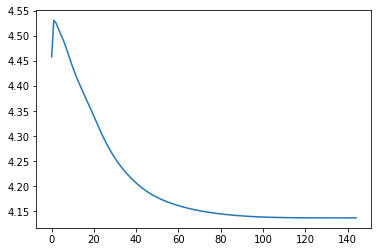

In [50]:
plt.plot(entropies)

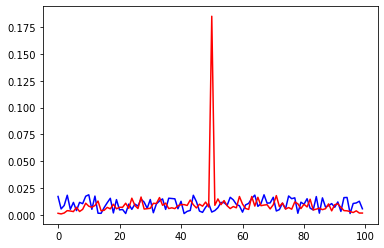

In [51]:
plt.plot(prob_distributions[0], color="blue")
plt.plot(prob_distributions[-1], color="red")

**Therefore the entropy of a Markov chain does not always increase!**